In [54]:
# Import Relevant Libraries
import csv
import numpy
import math
import numpy as np
import matplotlib.pyplot as plt
from statistics import stdev
from mpl_toolkits.mplot3d import Axes3D

def eigen(cov_mat,shift1,shift2):
    print('Values between ')
    # w - eigenvalues
    # v - eigenvectors
    w, v = np.linalg.eig(cov_mat)

    print("Eigenvalues")
    print(w)
    print("Eigenvectors")
    print(v)
    # Sort according to eigenvalues
    index = np.argsort(-w)
    print("Eigenvalues idx")
    print(index)
    # Use all eigenvectors for full reconstruction
    feature_vector = v[:,index]
    print("Feature vector")
    print(feature_vector)

    RowFeatureVector = np.transpose(feature_vector)
    RowZeroMeanData = np.array([shift1, shift2])
    
    print("RowZeroMeanData")
    print(RowZeroMeanData)

    FinalData = np.transpose(np.matmul(RowFeatureVector, RowZeroMeanData))
    print("FinalData")
    print(FinalData)
    return FinalData

In [55]:
#Open the textfile and read the lines into a container
with open("Fisher.txt") as f:
    content = f.readlines()

#Seperate the first row that contains the titles only    
titles = content[0].split()
#Seperate the rest of the data into a list 
lines = [line.split() for line in content[1:]]

#Extract the features as row vectors
Petal_Width=np.array([float(flower[1]) for flower in lines])
Petal_Length=np.array([float(flower[2]) for flower in lines])
Sepal_Width=np.array([float(flower[3]) for flower in lines])
Sepal_Length=np.array([float(flower[4]) for flower in lines])



In [56]:
# Compute the means
Petal_Width_mean=np.mean(Petal_Width)
Petal_Length_mean=np.mean(Petal_Length)
Sepal_Width_mean=np.mean(Sepal_Width)
Sepal_Length_mean=np.mean(Sepal_Length)

# Normalize the features values
norm_PW=Petal_Width-Petal_Width_mean
norm_PL=Petal_Length-Petal_Length_mean
norm_SW=Sepal_Width-Sepal_Width_mean
norm_SL=Sepal_Length-Sepal_Length_mean

# Find the Covariance matrices
PW_PL_cov = np.cov(norm_PW,norm_PL)
SW_SL_cov = np.cov(norm_SW,norm_SL)
PW_SL_cov = np.cov(norm_PW,norm_SL)
SW_PL_cov = np.cov(norm_SW,norm_PL)
PW_SW_cov = np.cov(norm_PW,norm_SW)
PL_SL_cov = np.cov(norm_PL,norm_SL)

# Compute the final data
final1=eigen(PW_PL_cov,norm_PW,norm_PL)
final2=eigen(SW_PL_cov,norm_SW,norm_PL)
final3 = eigen(PW_SW_cov, norm_PW, norm_SW)



Values between 
Eigenvalues
[  4.23092393 369.05341612]
Eigenvectors
[[-0.92442536 -0.38136302]
 [ 0.38136302 -0.92442536]]
Eigenvalues idx
[1 0]
Feature vector
[[-0.38136302 -0.92442536]
 [-0.92442536  0.38136302]]
RowZeroMeanData
[[ -9.92666667  12.07333333  11.07333333  -9.92666667   8.07333333
    7.07333333   1.07333333   4.07333333   5.07333333   2.07333333
   -9.92666667   7.07333333 -10.92666667  -9.92666667   0.07333333
    6.07333333  -1.92666667  -9.92666667  -9.92666667   9.07333333
   -7.92666667  -9.92666667  -1.92666667   3.07333333  -9.92666667
    7.07333333  -7.92666667   6.07333333  -1.92666667  -9.92666667
    3.07333333   2.07333333  -9.92666667   0.07333333  11.07333333
    3.07333333   8.07333333   6.07333333   1.07333333   3.07333333
   -0.92666667   9.07333333  13.07333333   1.07333333   9.07333333
  -10.92666667  -8.92666667   2.07333333  -7.92666667   5.07333333
   10.07333333   3.07333333   3.07333333   2.07333333  -0.92666667
   11.07333333  11.07333333  13

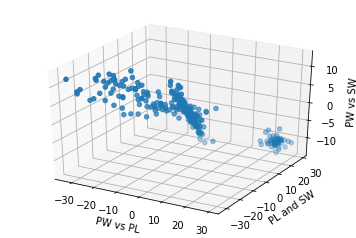

In [57]:
# Display 3D scatter plot for the corresponding final data. SL excluded.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(final1, final2, final3)
ax.set_xlabel("PW vs PL")
ax.set_ylabel("PL and SW")
ax.set_zlabel("PW vs SW")
plt.show()